# 🛒 Instacart – Exploratory Data Analysis

## Objectifs
- Comprendre les habitudes d’achat des utilisateurs
- Analyser la fréquence et la composition des paniers
- Identifier des patterns temporels (jours, heures)
- Préparer le terrain pour de la recommandation produit


In [32]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10,6)

In [33]:
orders = pd.read_csv("../data_raw/orders.csv")
order_products = pd.read_csv("../data_raw/order_products__prior.csv")
products = pd.read_csv("../data_raw/products.csv")
aisles = pd.read_csv("../data_raw/aisles.csv")
departments = pd.read_csv("../data_raw/departments.csv")


In [34]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


## 1️⃣ Analyse des commandes
### 📦 Nombre de commandes par utilisateur

In [35]:
orders_per_user = orders.groupby("user_id")["order_id"].count()

orders_per_user.describe()


count    206209.000000
mean         16.590367
std          16.654774
min           4.000000
25%           6.000000
50%          10.000000
75%          20.000000
max         100.000000
Name: order_id, dtype: float64

Text(0, 0.5, 'Number of users')

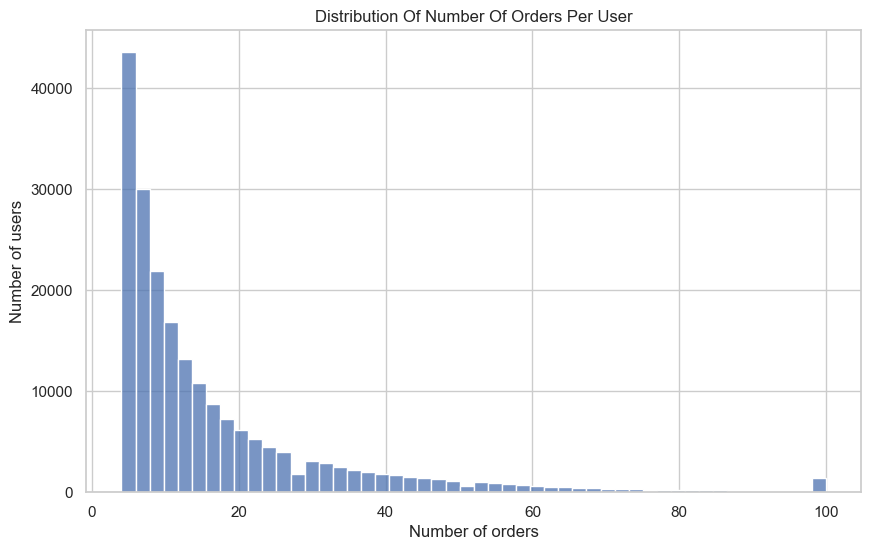

In [36]:
sns.histplot(orders_per_user, bins=50)
plt.title("Distribution Of Number Of Orders Per User")
plt.xlabel("Number of orders")
plt.ylabel("Number of users")

### 📌 Insight 
The Majority of users make few commands, while a small group of user is very actif.

## 2️⃣ Analyse temporelle
### 🕒 Heures de commande

Text(0.5, 1.0, 'Distribution des commandes par heure')

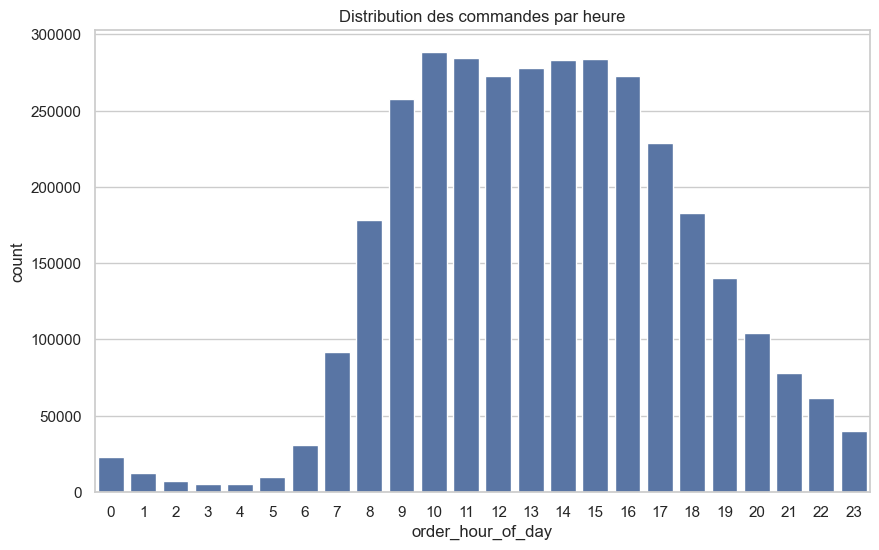

In [37]:
sns.countplot(x="order_hour_of_day", data=orders)
plt.title("Distribution des commandes par heure")


#### 📌 Insight :

* Pics arround 10–11h and 17–18h
* less commands at night

📅 Jours de la semaine

Text(0.5, 0, 'Day of the week')

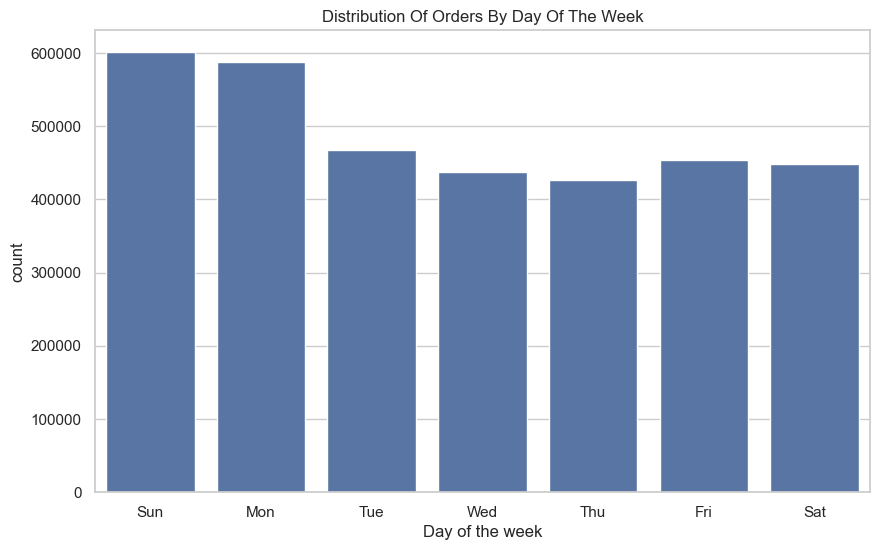

In [38]:
dow_map = {
    0: "Sun", 1: "Mon", 2: "Tue",
    3: "Wed", 4: "Thu", 5: "Fri", 6: "Sat"
}

orders["dow_label"] = orders["order_dow"].map(dow_map)

sns.countplot(x="dow_label", data=orders,
              order=["Sun","Mon","Tue","Wed","Thu","Fri","Sat"])
plt.title("Distribution Of Orders By Day Of The Week")
plt.xlabel("Day of the week")  




## 3️⃣ Analyse des produits
🥦 Produits les plus commandés

Text(0, 0.5, 'Nom du produit')

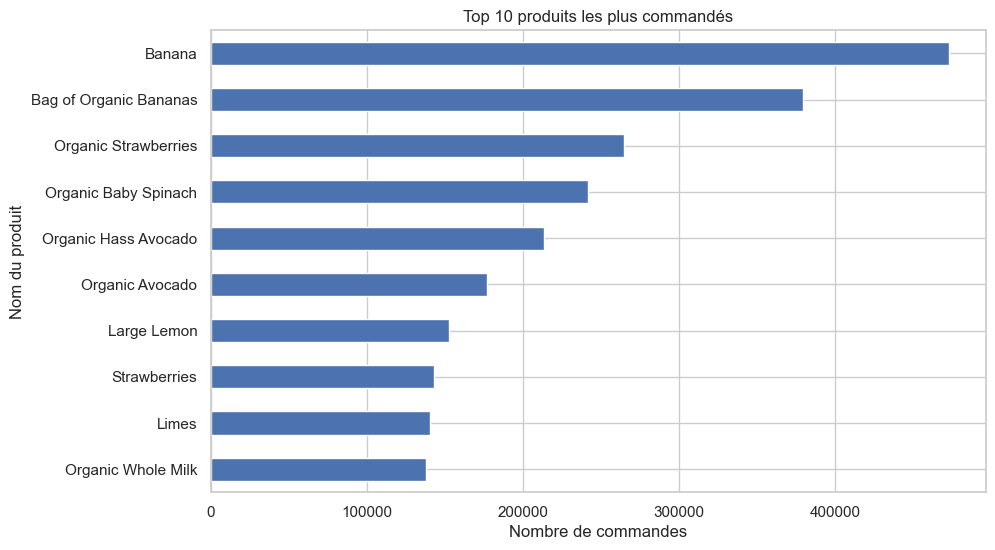

In [39]:
top_products = (
    order_products
    .merge(products, on="product_id")
    .groupby("product_name")
    .size()
    .sort_values(ascending=False)
    .head(10)
)

top_products.plot(kind="barh")
plt.title("Top 10 produits les plus commandés")
plt.gca().invert_yaxis()
plt.xlabel("Nombre de commandes")
plt.ylabel("Nom du produit")

📌 Insight :

Les produits frais dominent (fruits, vegetables, fruits).

#### 🏷️ Répartition par département

Text(0, 0.5, 'Département')

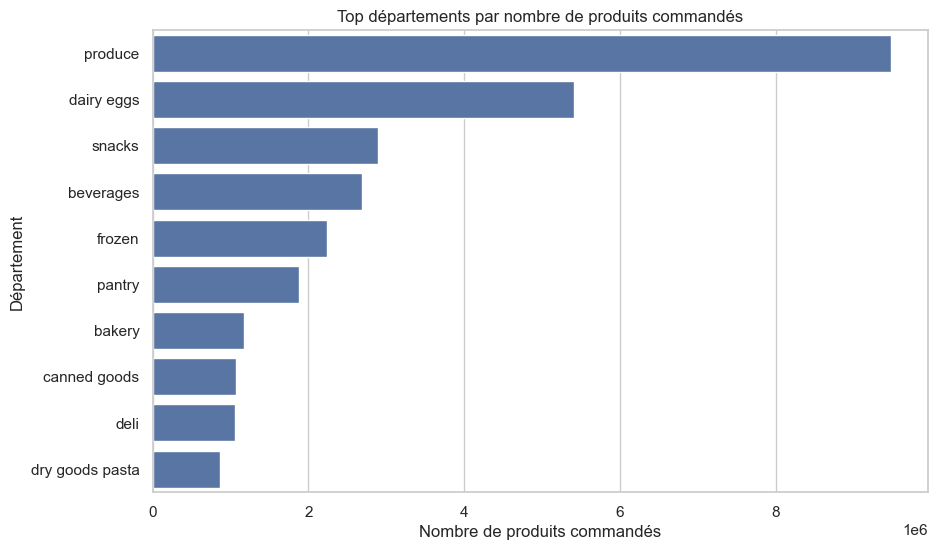

In [40]:
prod_dept = (
    order_products
    .merge(products, on="product_id")
    .merge(departments, on="department_id")
)

dept_counts = prod_dept["department"].value_counts().head(10)

sns.barplot(x=dept_counts.values, y=dept_counts.index)
plt.title("Top départements par nombre de produits commandés")
plt.xlabel("Nombre de produits commandés")
plt.ylabel("Département")

## 4️⃣ Taille des paniers (Basket Size)


Text(0.5, 0, 'Nombre de produits par commande')

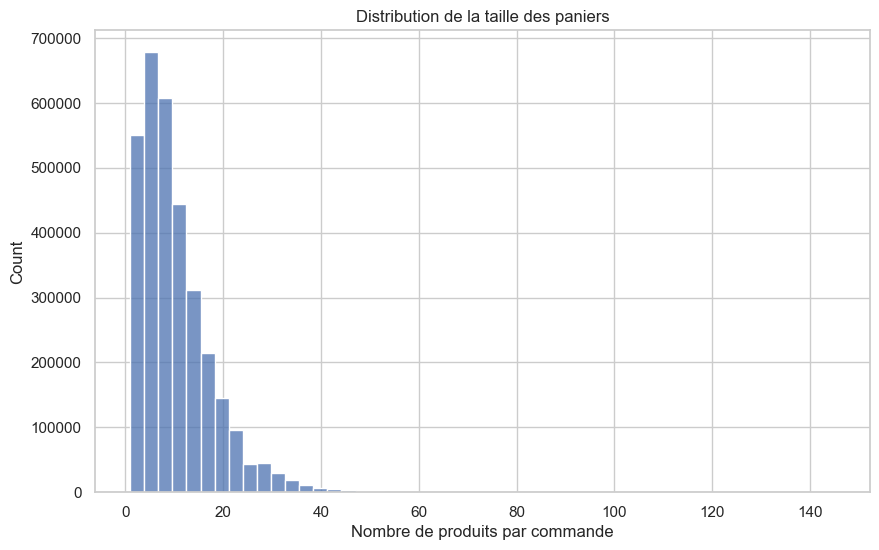

In [41]:
basket_size = order_products.groupby("order_id").size()

sns.histplot(basket_size, bins=50)
plt.title("Distribution de la taille des paniers")
plt.xlabel("Nombre de produits par commande")

📌 Insight :

Most baskets contains between 5 and 15 products

## 5️⃣ Produits réachetés 

In [42]:
reorder_rate = order_products["reordered"].mean()
reorder_rate

reorder_by_product = (
    order_products
    .merge(products, on="product_id")
    .groupby("product_name")["reordered"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
)


Text(0.5, 1.0, 'Top 10 produits avec le plus haut taux de re-commande')

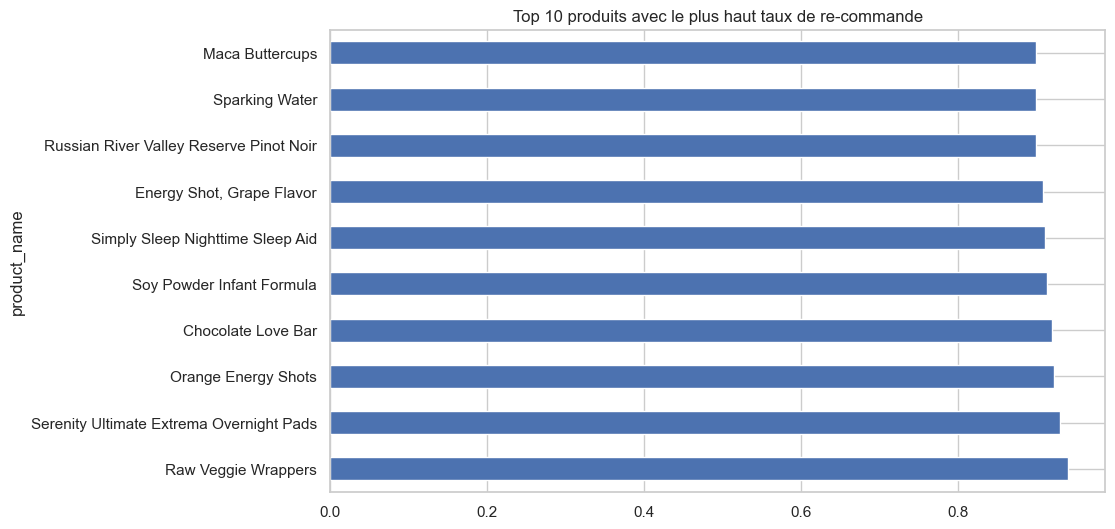

In [43]:
reorder_by_product.plot(kind="barh")
plt.title("Top 10 produits avec le plus haut taux de re-commande")

📌 Insight :

Certains produits sont fortement fidélisants.

## Conclusions
- Les commandes suivent des patterns temporels clairs
- Les produits frais sont dominants
- Les paniers ont une taille stable
- Le taux de réachat est élevé → potentiel de recommandation

## Prochaines étapes
- Market Basket Analysis (Apriori / FP-Growth)
- Modèle de recommandation
- Segmentation utilisateurs
